# AUTOCORRELATION

   ##### Correlation between member of series of observations ordered in time or space.
 
   ##### Autocorrelation measures the relationship between a variable's current value and its past values. 

## Example of Autocorrelation

Data on indexes of real compensation per hour (Y) and output per hour (X) in the Business Sector of the United States economy for the period 1960-2005.

Y = Index of real compensation per hour.

X = Index of output per hour.

### Data

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r'E:\Msc sem 4\Econ lab\Midsem Exam Presentation\12.4 DATA.xlsx')
print(df.head())
print('Shape of data =',df.shape)

   Year     Y     X
0  1960  60.8  48.9
1  1961  62.5  50.6
2  1962  64.6  52.9
3  1963  66.1  55.0
4  1964  67.7  56.8
Shape of data = (46, 3)


### Data Visualisation

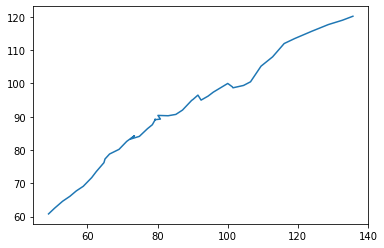

In [3]:
plt.plot(df['X'],df['Y'])
plt.show()

##### We can see that there is a linear relationship between the real compensation and labor productivity.

In [4]:
from statsmodels.formula.api import ols
model=ols('Y ~ X',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1830.
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.72e-37
Time:                        09:00:37   Log-Likelihood:                -104.22
No. Observations:                  46   AIC:                             212.4
Df Residuals:                      44   BIC:                             216.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.7419      1.394     23.487      0.000      29.932      35.551
X              0.6704      0.016     42.781      0.000       0.639       0.702
==============================================================================
Omnibus:                        6.217   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                3.054
Skew:                          -0.379   Prob(JB):                        0.217
Kurtosis:                       1.990   Cond. No.                         353.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Detecting Autocorrelation

#### Graphical Method

In [5]:
Residuals = model.resid

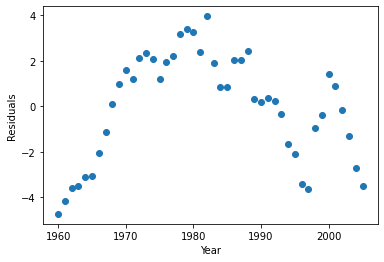

In [6]:
plt.scatter(df.Year, Residuals)
plt.ylabel("Residuals")
plt.xlabel("Year")
plt.show()

In [7]:
#plot_acf?

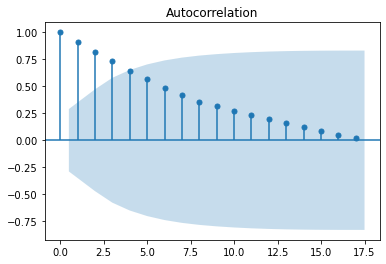

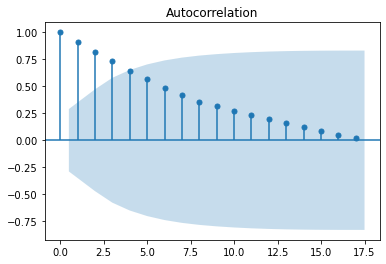

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Y'])

* Above is the autocorrelation plot for different lags. Here, we can see that there is some autocorrelation for significance level 0.05.

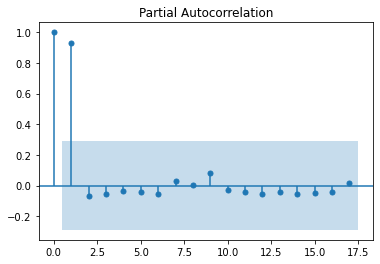

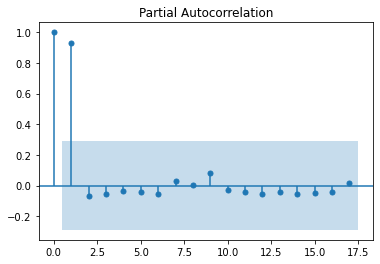

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Y'], alpha = 0.05)

* From the partial autocorrelation, Here, we can see for a 0.05 level of significance there is some partial autocorrelation for the different values of lags. For lag 0 the 100% partial autocorrelation is obvious but for lag 1 also the partial autocorrelation is very high.

## Run Test
### Hypothesis
#### H0: Runs are randomly produced
#### H1: Runs are not randomly produced

In [10]:
#N = total number of observations = N1 + N2
N=46

#number of + symbols (i.e., + residuals)
N1=0

#number of − symbols (i.e., − residuals)
N2=0

for i in Residuals:
    if i>0:
        N1=N1+1
    else: 
        N2=N2+1
        
#We now define a run as an uninterrupted sequence of one symbol or attribute, such as + or −.
R=5

#E(R)
mean=((2*N1*N2)/N)+1

#Var(R)
var=((2*N1*N2)*((2*N1*N2)-N))/(N*N*(N-1))

#Z_calculated=R-E(R)/Var(R)
Zcal = abs(R-mean)/np.sqrt(var)

#Z_tabulated=R-E(R)/Var(R)
Ztab = 1.96

In [11]:
Zcal

5.632894666798474

#### Critical Region:
If Zcal > Ztab , We reject the null hypothesis at 5% level of significance.

#### Conclusion:
We conclude that runs are not randomly produced.

### Runs are not randomly produced.

## Durbin-Watson Test
### Hypothesis
H0: No positive autocorrelation; Reject H0 if 0 < d < dL

H0: No positive autocorrelation; No decision if dL ≤ d ≤ dU

H0: No negative correlation; Reject H0 if 4 − dL < d < 4

H0: No negative correlation; No decision if No decision 4 − dU ≤ d ≤ 4 − dL

H0: No autocorrelation, positive or negative Do not reject if dU < d < 4 − dU

In [12]:
from statsmodels.stats.stattools import durbin_watson
round(durbin_watson(model.resid),4)

0.1739

## Critical Region
From the Durbin–Watson tables, we find that for 46 observations and one explanatory variable,

dL = 1.475

dU = 1.566

at the 5 percent level of significance.

## Conclusion
Since the computed d of 0.1738 lies below dL , we reject the hypothesis that there is no positive serial correlation in the residuals.

There is rule of thumb that if the test statistic is in between 1.5 and 2.5 then we would consider autocorrelation not be problematic in this regression model. From that we can say that autocorrelation will be problematic in this regression model.

* Here, we can see that Durbin-Watson statistics are closer to 0. Hence, there is some positive autocorrelation to the linear model.

## Breusch-Godfrey Test

In [13]:
import statsmodels.stats.diagnostic as dg
bg_test = dg.acorr_breusch_godfrey(model, nlags = 3)
test_statistic = bg_test[0]
p_value = bg_test[1]
print('Pvalue is =',p_value)

Pvalue is = 1.181991532400962e-07


* We reject the null hypothesis and conclude that Autocorrelation is present in the residuals.

# Trying out Remedies

In [14]:
ln_Y = np.log(df["Y"])
df['ln_Y'] = ln_Y

In [15]:
lag_ln_Y = ln_Y.shift(-1)
lag_ln_Y = lag_ln_Y[:45]
df['lag_ln_Y'] = lag_ln_Y
df.head()

,Year,Y,X,ln_Y,lag_ln_Y
0,1960,60.8,48.9,4.107590,4.135167
1,1961,62.5,50.6,4.135167,4.168214
2,1962,64.6,52.9,4.168214,4.191169
3,1963,66.1,55.0,4.191169,4.215086
4,1964,67.7,56.8,4.215086,4.235555


In [16]:
model2 = ols('lag_ln_Y ~ X', df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lag_ln_Y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     887.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           2.44e-30
Time:                        09:00:40   Log-Likelihood:                 86.298
No. Observations:                  45   AIC:                            -168.6
Df Residuals:                      43   BIC:                            -165.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8577      0.022    173.857      0.000       3.813       3.902
X              0.0075      0.000     29.788      0.000       0.007       0.008
==============================================================================
Omnibus:                        5.119   Durbin-Watson:                   0.168
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.991
Skew:                          -0.796   Prob(JB):                       0.0824
Kurtosis:                       2.639   Cond. No.                         359.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
Residuals2 = model2.resid
print(len(Residuals2))
print(len(df.Year))

45
46


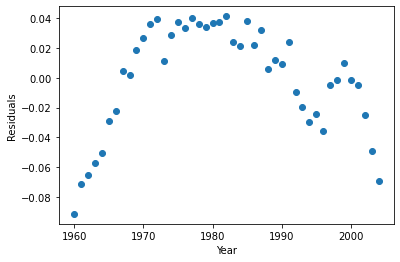

In [18]:
plt.scatter(df.Year[:45], Residuals2)
plt.ylabel("Residuals")
plt.xlabel("Year")
plt.show()

In [19]:
lag_d_ln_Y = np.diff(lag_ln_Y)
len(lag_d_ln_Y)

44

In [20]:
df2 = df[:44]
df2.shape

(44, 5)

In [21]:
df2['lag_d_ln_Y'] = lag_d_ln_Y
df2.head()

<ipython-input-21-8a15aabc85f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['lag_d_ln_Y'] = lag_d_ln_Y


,Year,Y,X,ln_Y,lag_ln_Y,lag_d_ln_Y
0,1960,60.8,48.9,4.107590,4.135167,0.033048
1,1961,62.5,50.6,4.135167,4.168214,0.022954
2,1962,64.6,52.9,4.168214,4.191169,0.023917
3,1963,66.1,55.0,4.191169,4.215086,0.020469
4,1964,67.7,56.8,4.215086,4.235555,0.036936


In [22]:
model3 = ols('lag_d_ln_Y ~ X', df2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             lag_d_ln_Y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.932
Date:                Wed, 13 Apr 2022   Prob (F-statistic):              0.172
Time:                        09:00:40   Log-Likelihood:                 128.09
No. Observations:                  44   AIC:                            -252.2
Df Residuals:                      42   BIC:                            -248.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0265      0.009      3.079      0.004       0.009       0.044
X             -0.0001   9.96e-05     -1.390      0.172      -0.000    6.25e-05
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.022
Skew:                          -0.006   Prob(JB):                        0.989
Kurtosis:                       3.109   Cond. No.                         365.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
Residuals3 = model3.resid
print(len(Residuals3))
print(len(df.Year))

44
46


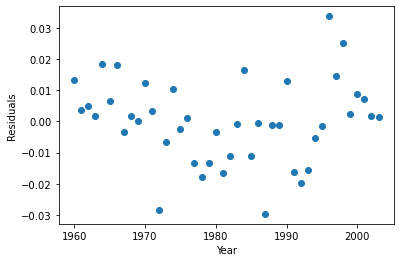

In [24]:
plt.scatter(df.Year[:44], Residuals3)
plt.ylabel("Residuals")
plt.xlabel("Year")
plt.show()